In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

### Set up the variables

In [2]:
# ordinary variables
accel_grav = -9.81 # meters / sec**2
radius = .05 # meters
mass = .5 # kg

# derived variables
weight = mass * accel_grav
projected_area = np.pi * radius**2

# time grid for simulation
t0, t_end = 0, 15 # seconds
dt = .1
time_grid = np.arange(t0, t_end, dt)

# the rest are defined in relation to flows only

### Solve with ODE Integrator

In [3]:
def differentials(pos_vel, t, projected_area, weight, mass):
    # unpack the arguments
    position, velocity = pos_vel
    
    # get the change in velocity
    air_friction = -.65 * projected_area * velocity * np.abs(velocity)
    total_force = weight + air_friction
    acceleration = total_force / mass
    
    # change in position is velocity, 
    # change in velocity is acceleration
    return [velocity, acceleration]

# compute flows

results = integrate.odeint(differentials, [400, 0], time_grid, 
                            args=(projected_area, weight, mass),
                            full_output=True)

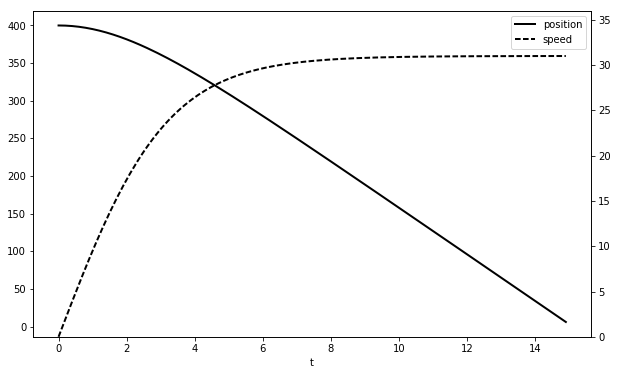

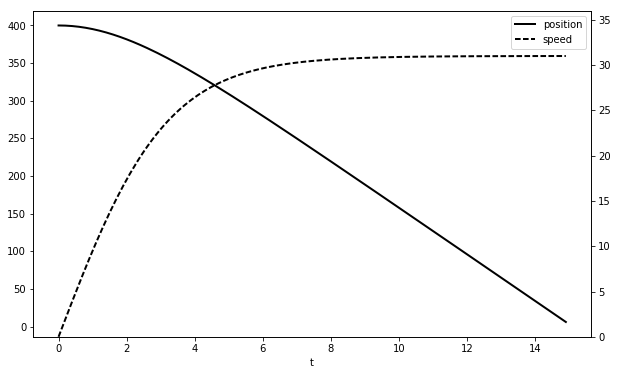

In [5]:
fig, ax = plt.subplots(subplot_kw=dict(xlabel="t"),
            figsize=(10,6))
pos = ax.plot(time_grid, results[0][:,0], 'k-', label="position",
              lw=2)
ax.grid(False)
ax.set_xlim(0, 15)

# create a second y-axis for the different scale of position
ax2 = ax.twinx()
vel = ax2.plot(time_grid, np.abs(results[0][:,1]), 
               'k--', label="speed", lw=2)
ax2.grid(False)
lines = pos + vel
labels = [line.get_label() for line in lines]
ax2.set_ylim(0, 36)
ax2.legend(lines, labels);
plt.show()

### Solve with a Loop

In [6]:
# stock variables
velocity = np.zeros_like(time_grid)
position = np.zeros_like(time_grid)
velocity[0] = 0
position[0] = 400 # meters

# compute flows

for i in range(len(time_grid)-1):        
    air_friction = -.65 * projected_area * velocity[i] * np.abs(velocity[i])
    total_force = weight + air_friction
    change_velocity = total_force / mass
    velocity[i+1] = velocity[i] + change_velocity * dt
    position[i+1] = position[i] + velocity[i] * dt

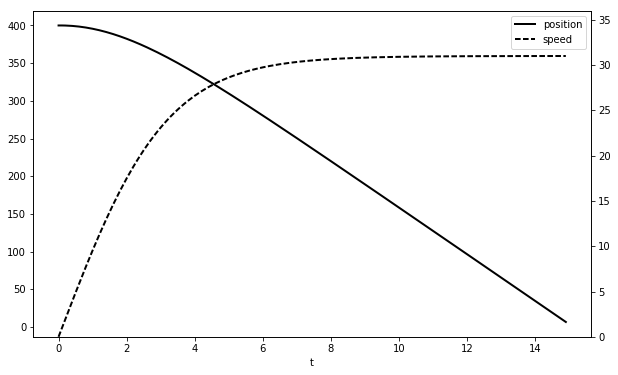

In [7]:
fig, ax = plt.subplots(subplot_kw=dict(xlabel="t"),
                       figsize=(10,6))
pos = ax.plot(time_grid, position, 'k-', label="position",
              lw=2)
ax.grid(False)
ax.set_xlim(0, 15)

# create a second y-axis for the different scale of position
ax2 = ax.twinx()
vel = ax2.plot(time_grid, np.abs(velocity), 
               'k--', label="speed", lw=2)
ax2.grid(False)
lines = pos + vel
labels = [line.get_label() for line in lines]
ax2.set_ylim(0, 36)
ax2.legend(lines, labels);
plt.show()